Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [17]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [18]:
X_moons, y_moons = make_moons(
    n_samples = 10000,
    noise = 0.4,
    random_state = 42
)

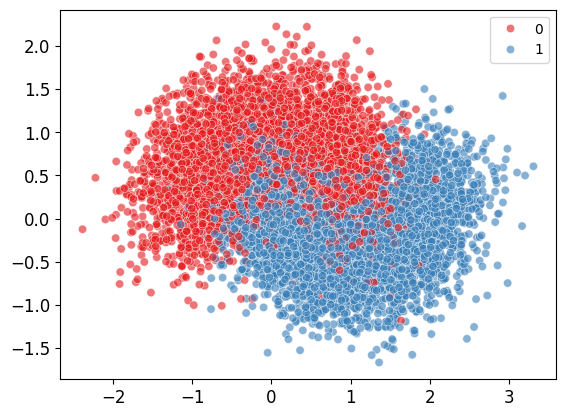

In [19]:
sns.scatterplot(
    x = X_moons[:, 0],
    y = X_moons[:, 1],
    hue = y_moons,
    palette = "Set1",
    alpha = 0.6
)

plt.show()

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_moons,
    y_moons,
    test_size= 0.2,
    random_state = 42
)

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [22]:
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1013
           1       0.81      0.82      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [24]:
tree_clf_limited = DecisionTreeClassifier(
    max_depth= 5, #limita complejidad
    max_leaf_nodes= 15, #limita número de reglas finales
    random_state = 42
)

### Ejercicio 6

Entrénalo, evalúalo contra test y muestra el resultado a través del classification_report.

In [27]:
tree_clf_limited.fit(X_train, y_train)

y_pred_limited = tree_clf_limited.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred_limited))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1013
           1       0.84      0.89      0.86       987

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [29]:
n_trees = 1000
n_instances = 100

shuffle_split = ShuffleSplit(
    n_splits= n_trees,
    train_size= n_instances,
    random_state=42
)

### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [31]:
forest = []

for train_index, _ in shuffle_split.split(X_train):
    X_subset = X_train[train_index]
    y_subset = y_train[train_index]

    tree = DecisionTreeClassifier(
        max_depth= 5, #limita complejidad
        max_leaf_nodes= 15, #limita número de reglas finales
        random_state = 42
    )

    tree.fit(X_subset, y_subset)
    forest.append(tree)



### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [32]:
accuracies = []

for trees in forest:
    y_pred_tree = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred_tree)
    accuracies.append(acc)

print("Accuracy media:", np.mean(accuracies))

Accuracy media: 0.8249999999999997


*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

In [33]:
predicciones_list = []

for tree in forest:
    predicciones_list.append(tree.predict(X_test))


### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [36]:
from scipy.stats import mode

predicciones_array = np.array(predicciones_list)

y_pred_consejo = mode(predicciones_array, axis=0).mode.ravel()


In [ ]:
# Ejemplo de votación para la primera instancia de X_test
y_pred_consejo = []

for i in range(len(X_test)):
    votos_0 = 0
    votos_1 = 0
    
    for tree_pred in predicciones_list:
        if tree_pred[i] == 0:
            votos_0 += 1
        else:
            votos_1 += 1
            
    y_pred_consejo.append(0 if votos_0 > votos_1 else 1)

y_pred_consejo = np.array(y_pred_consejo)


### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`

In [37]:
print("Accuracy consejo:",
      accuracy_score(y_test, y_pred_consejo))


Accuracy consejo: 0.8735



---

# Visión general del ejercicio (antes de entrar ejercicio a ejercicio)

## ¿Cuál es el objetivo real de toda la práctica?

**Entender tres ideas clave de Árboles de Decisión en Clasificación:**

1. **Por qué un árbol tiende a sobreajustar**
2. **Cómo controlar ese sobreajuste con hiperparámetros**
3. **Por qué muchos árboles malos juntos pueden formar un modelo bueno (bagging / Random Forest)**

Todo el ejercicio está diseñado **solo para demostrar esto**, no para construir un modelo “realista”.

---

## Entonces… ¿por qué el dataset *moons*?

### Qué es `make_moons`

`make_moons` genera **datos artificiales** con estas propiedades:

* Dos clases (`0` y `1`)
* Distribución **no lineal**
* Fácil de visualizar en 2D
* Control del ruido

Ejemplo visual:

![alt text](https://www.researchgate.net/publication/383537180/figure/fig2/AS%3A11431281657717499%401759318292256/The-plot-has-been-generated-using-simulated-data-from-sklearndatasets-make-moons-using_Q320.jpg)

![Image](https://scikit-learn.org/0.15/_images/plot_cluster_comparison1.png)

---

## ¿Por qué no usar un dataset real?

Porque **aquí no se quiere resolver un problema**, se quiere:

* ver el comportamiento interno del modelo
* aislar conceptos
* eliminar distracciones (preprocesado, NaNs, encoding, etc.)

Con un dataset real:

* no ves claramente el overfitting
* no sabes si mejoras por el modelo o por el preprocesado
* no puedes dibujar ni intuir fronteras

📌 *Moons* es un **dataset de laboratorio**, no de producción.

---

# Ahora sí: ejercicio a ejercicio

---

## Ejercicio 1 – Generar los datos

### Qué se hace

```python
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)
```

### Qué se obtiene

* `X_moons`: coordenadas (X, Y)
* `y_moons`: clase (0 o 1)

### Por qué

* Queremos un problema **no lineal**
* Con ruido para que no sea trivial

### Para qué

Probar cómo un árbol:

* se adapta demasiado
* intenta memorizar ruido

---

## Ejercicio 2 – Visualización

### Qué se hace

Un scatter plot con colores por clase.

### Qué se obtiene

Ves claramente:

* dos medias lunas
* solapamiento
* ruido

### Por qué

Un analista **debe entender el problema antes de modelar**.

### Para qué

Saber que:

* regresión logística fallaría
* árboles pueden adaptarse bien (quizá demasiado)

---

## Ejercicio 3 – Train / Test split

### Qué se hace

Separar datos de entrenamiento y prueba.

### Qué se obtiene

* Datos para aprender
* Datos nunca vistos

### Por qué

Evaluar **generalización**, no memoria.

### Para qué

Detectar overfitting.

---

## Ejercicio 4 – Árbol sin restricciones

### Qué se hace

```python
DecisionTreeClassifier()
```

### Qué se obtiene

Un árbol:

* muy profundo
* muchas reglas
* hiperflexible

### Por qué

Los árboles, por defecto:

* **crecen hasta clasificar perfectamente el train**

### Para qué

Demostrar **overfitting puro**.

---

## Ejercicio 5 – Evaluación del árbol “salvaje”

### Qué se obtiene

* Accuracy muy alta en train
* Menor en test

### Qué se aprende

El árbol:

* aprende ruido
* no generaliza bien

📌 **Este es el problema central de los árboles**

---

## Ejercicio 6 – Árbol con hiperparámetros

### Qué se hace

```python
max_depth=5
max_leaf_nodes=15
```

### Qué se obtiene

Un árbol:

* más simple
* menos reglas
* menos específico

### Por qué

Reducir **varianza**

### Para qué

Buscar equilibrio bias–variance.

---

## Ejercicio 7 – Comparación

### Qué se aprende

* A veces el árbol limitado **generaliza mejor**
* Menos complejidad ≠ peor modelo

---

## Ejercicio 8 – Subconjuntos pequeños (bootstrap)

### Qué se hace

Entrenar árboles con **100 muestras** cada uno.

### Qué se obtiene

Muchos árboles:

* muy malos individualmente
* muy distintos entre sí

### Por qué

Introducir **diversidad**.

### Para qué

Base del bagging.

---

## Ejercicio 9 – Accuracy individual

### Qué se observa

* Accuracy mediocre por árbol

### Qué se aprende

Un árbol débil ≠ inútil.

---

## Ejercicio 10–11 – Votación (hard voting)

### Qué se hace

Cada árbol vota una clase.

### Qué se obtiene

Una predicción final **más estable**.

### Por qué funciona

Los errores individuales:

* no son los mismos
* se cancelan

📌 Esto es **reducción de varianza**

---

## Ejercicio 12 – Evaluación final

### Qué se aprende

* El conjunto supera a cada árbol individual
* Nace la idea de Random Forest

---

# Objetivo final (resumen)

Este ejercicio **NO va de moons**
**NO va de accuracy**
**NO va de hacer el mejor modelo**

Va de que entiendas:

1. Por qué los árboles sobreajustan
2. Cómo se controla ese sobreajuste
3. Por qué los ensembles funcionan
